# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#To start the step of preprossing the dataset is neccessary to import some useful Python libraries.
import pandas as pd
import numpy as np
import requests 
import re
import json
import os 
import tweepy
from tweepy import OAuthHandler
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
# view the first 3 rows in twitter_archive data
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    #reading tweet image predictions tsv file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
# view the first 3 rows in image_predictions data
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [25]:
import tweepy

#Defining the keys
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [ ]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

In [6]:
data_tweet = pd.read_json('tweet_json.txt',lines=True)
# view the first 3 rows 
data_tweet.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34551,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7193,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29948,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5399,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22534,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3565,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 
**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### I.Assessing Data | twitter_archive Dataset

In [8]:
#useful method is info that shows a summary of the twitter_archive dataset, 
#like number of observations, columns, variable type and the total memory usage
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The dataset have 2356 observations, 17 columns and with no null values. The data types of the variables are divided in 4 float, 2 integer and 10 object.sample is a easy way to get a few data quickly.

In [9]:
twitter_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1375,701889187134500865,NaN,NaN,2016-02-22 21:59:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bilbo. He's not emotionally prepared t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701889187...,11,10,Bilbo,None,None,None,None
1688,681523177663676416,NaN,NaN,2015-12-28 17:12:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
366,828801551087042563,NaN,NaN,2017-02-07 03:04:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gus. He likes to be clo...,8.102541e+17,4.196984e+09,2016-12-17 22:43:27 +0000,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None


In [10]:
#show the statical information
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
#find if there is any duplicated values
twitter_archive.duplicated().sum()

0

In [12]:
# cheek null value in all columns
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### II.Assessing Data | image_predictions Dataset

In [13]:
#useful method is info that shows a summary of the twitter_archive dataset, 
#like number of observations, columns, variable type and the total memory usage
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1802,832032802820481025,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,whippet,0.601712,True,Ibizan_hound,0.152662,True,Italian_greyhound,0.135055,True
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False
876,698262614669991936,https://pbs.twimg.com/media/CbC6JL_WEAI_PhH.jpg,1,Italian_greyhound,0.107948,True,basset,0.075230,True,Staffordshire_bullterrier,0.069436,True
1339,758474966123810816,https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg,1,Pembroke,0.546145,True,Cardigan,0.244200,True,German_shepherd,0.100429,True


In [15]:
#show the statical information
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
#find if there is any duplicated values
image_predictions.duplicated().sum()

0

In [17]:
# cheek null value in all columns
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [19]:
image_predictions['p2'].value_counts()


Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [20]:
image_predictions['p3'].value_counts()


Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

### III.Assessing Data | data_tweet Dataset

In [21]:
#useful method is info that shows a summary of the twitter_archive dataset, 
#like number of observations, columns, variable type and the total memory usage
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       874 non-null datetime64[ns]
display_text_range               874 non-null object
entities                         874 non-null object
extended_entities                719 non-null object
favorite_count                   874 non-null int64
favorited                        874 non-null bool
full_text                        874 non-null object
geo                              0 non-null float64
id                               874 non-null int64
id_str                           874 non-null int64
in_reply_to_screen_name          32 non-null object
in_reply_to_status_id            32 non-null float64
in_reply_to_status_id_str        32 non-null float64
in_reply_to_user_id              32 non-null float64
in_reply_to_user_id_str          32 non-null flo

In [22]:
data_tweet.sample(4)


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
151,NaN,NaN,2017-05-06 23:49:50,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 861005103205031937, 'id_str'...",15337,False,This is Burt. He thinks your thesis statement ...,NaN,...,NaN,NaN,NaN,NaN,3407,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
693,NaN,NaN,2016-10-07 16:33:21,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 784431410685902849, 'id_str'...",5558,False,This is Stormy. He's curly af. Already pupared...,NaN,...,NaN,NaN,NaN,NaN,1225,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
532,NaN,NaN,2016-12-02 17:27:25,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 804738744741928960, 'id_str'...",13295,False,This is Django. He accidentally opened the fro...,NaN,...,NaN,NaN,NaN,NaN,3688,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
655,NaN,NaN,2016-10-21 22:48:24,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 789599232806223873, 'id_str'...",6546,False,This is Brownie. She's wearing a Halloween the...,NaN,...,NaN,NaN,NaN,NaN,1849,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [24]:
# cheek null value in all columns
data_tweet.isnull().sum()

contributors                     874
coordinates                      874
created_at                         0
display_text_range                 0
entities                           0
extended_entities                155
favorite_count                     0
favorited                          0
full_text                          0
geo                              874
id                                 0
id_str                             0
in_reply_to_screen_name          842
in_reply_to_status_id            842
in_reply_to_status_id_str        842
in_reply_to_user_id              842
in_reply_to_user_id_str          842
is_quote_status                    0
lang                               0
place                            873
possibly_sensitive               101
possibly_sensitive_appealable    101
quoted_status                    854
quoted_status_id                 853
quoted_status_id_str             853
quoted_status_permalink          853
retweet_count                      0
r

In [25]:
data_tweet['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    852
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        13
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      9
Name: source, dtype: int64

## Quality:
- Null values recorded as None and NaN(missing values)
- tweet_id type is int64 ,i will chanage tweet_id data type to string
- convert timestamp to be datetime and rename the column into tweet_date
- source mixed html tag
- We have some columns that contain unnecessary data: in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp ,... delet unneed column
- tweet_idf should be string type
- The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters.
- Missing values in some cloumns
- id column should named 'tweet_id' as the others data have ,and dtype should be
string , sourse change data type to category
- We have some columns that contain unnecessary data (created_at,full_text,Truncated,display_text_range,entities,extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,In_reply_to_screen_name,user,geo,coordinates,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,place,contributors,'is_quote_status
- source mixed html tag,Rewrite the tweet source, from iphone,..etc
- delete the duplicate rows because they represent duplicate tweets and we will take only the null (original non-duplicate tweets)







## Tidiness:
- The 4 different columns doggo, floofer, pupper and puppo, combine in one columns represent stages_of_dogs"
- extract breed of dog from columns p, p_conf and p_dog
- Merge twitter_archive_copy ,data_tweet_copy and image_predictions_copy to merge_df dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

Cleaning is the third step in the data wrangling processThe programmatic data cleaning process: Define: convert our assessments into defined cleaning tasks. These definitions also serve as an instruction list so others (or yourself in the future) can look at your work and reproduce it. Code: convert those definitions to code and run that code. Test: test your dataset, visually or with code, to make sure your cleaning operations worked.Required in the project,Clean each of the issues you documented while assessing ,The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned..

# Make copies of original pieces of data



In [26]:
#Create a copy of twitter_archive dataframe
twitter_archive_copy = twitter_archive.copy()
twitter_archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [27]:
#Create a copy of image_predictions dataframe 
image_predictions_copy = image_predictions.copy()
image_predictions_copy.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [28]:
#Create a copy of data_tweet dataframe 
data_tweet_copy = data_tweet.copy()
data_tweet_copy.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34551,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7193,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29948,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5399,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# Issue #0:

# Define:
delete the duplicate rows

In [29]:
# delete the duplicate rows because they represent duplicate tweets and we will take only the null (original non-duplicate tweets)
twitter_archive_copy=twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull()]
twitter_archive_copy=twitter_archive_copy[twitter_archive_copy.retweeted_status_user_id.isnull()]
twitter_archive_copy=twitter_archive_copy[twitter_archive_copy.retweeted_status_timestamp.isnull()]

# Test

In [33]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

# Issue #1:

# Define:

id_str column should named 'tweet_id' as the others data have , sourse change data type to category

## Code:

In [35]:
#ranme id _str columns to tweet_id
data_tweet_copy.rename(columns={'id_str':'tweet_id'},inplace=True)

In [36]:
data_tweet_copy.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34551,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7193,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29948,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5399,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [37]:
data_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       874 non-null datetime64[ns]
display_text_range               874 non-null object
entities                         874 non-null object
extended_entities                719 non-null object
favorite_count                   874 non-null int64
favorited                        874 non-null bool
full_text                        874 non-null object
geo                              0 non-null float64
id                               874 non-null int64
tweet_id                         874 non-null int64
in_reply_to_screen_name          32 non-null object
in_reply_to_status_id            32 non-null float64
in_reply_to_status_id_str        32 non-null float64
in_reply_to_user_id              32 non-null float64
in_reply_to_user_id_str          32 non-null flo

# Test

# Issue #2:

## Define
tweet_id' dtype should be string , 'sourse' change data type to category

# Code

In [38]:
#change tweet_id data type from int to object
data_tweet_copy['tweet_id'] = data_tweet_copy['tweet_id'].astype('str')

In [39]:
#change  source data dtype to category
data_tweet_copy['source'] = data_tweet_copy['source'].astype('category')

# Test

In [40]:
##test data dtype
print(data_tweet_copy['tweet_id'].dtype)
print(data_tweet_copy['source'].dtype)

object
category


In [41]:
data_tweet_copy.tweet_id.duplicated().sum()

0

In [42]:
data_tweet_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       874 non-null datetime64[ns]
display_text_range               874 non-null object
entities                         874 non-null object
extended_entities                719 non-null object
favorite_count                   874 non-null int64
favorited                        874 non-null bool
full_text                        874 non-null object
geo                              0 non-null float64
id                               874 non-null int64
tweet_id                         874 non-null object
in_reply_to_screen_name          32 non-null object
in_reply_to_status_id            32 non-null float64
in_reply_to_status_id_str        32 non-null float64
in_reply_to_user_id              32 non-null float64
in_reply_to_user_id_str          32 non-null fl

# Issue #3:

## Define
Incorrected datatypes on tweet-id and timestamp tweet_id, timestamp


# Code

In [43]:
#tweet_id type is int64 ,i will chanage tweet_id data type to string
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

In [44]:
#convert timestamp data type to datetime and rename the column into tweet_date
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy.rename(columns={"timestamp":'tweet_date'},inplace=True)

# Test

In [45]:
print(twitter_archive_copy['tweet_id'].dtypes)
print(twitter_archive_copy['tweet_date'].dtypes)

object
datetime64[ns]


In [46]:
#test change timestamp columns to tweet_data
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


# Issue #4:

# Defin
drop unnessary columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp ,source ..

# Code

In [47]:
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator']
twitter_archive_copy.drop(drop_columns, axis=1,inplace = True)

# Test

In [48]:
twitter_archive_copy.head(3)

,tweet_id,tweet_date,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None


# Issue #5:

# Defin
some columns that contain unnecessary data such as in_reply_to_user_id_str ... just need id,retweet_count,favorite_count


# Code

In [49]:
#Delete columns no needed
data_tweet_copy.drop(columns=['created_at','full_text','truncated','display_text_range','entities'
    ,'extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str'
     ,'in_reply_to_screen_name','user','geo','coordinates','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang'
    ,'retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','place','contributors','is_quote_status'],inplace=True)

# Test

In [50]:

data_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 6 columns):
favorite_count             874 non-null int64
id                         874 non-null int64
tweet_id                   874 non-null object
quoted_status_permalink    21 non-null object
retweet_count              874 non-null int64
source                     874 non-null category
dtypes: category(1), int64(3), object(2)
memory usage: 35.2+ KB


# Issue #6:

# Defin 
source mixed html tag,Rewrite the tweet source, from iphone,..etc


# Code

In [51]:
data_tweet_copy['source'] = data_tweet_copy["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


# Test 

In [52]:
data_tweet_copy['source'].value_counts()

Twitter for iPhone     852
Vine - Make a Scene     13
Twitter Web Client       9
Name: source, dtype: int64

In [53]:
data_tweet_copy.head(2)

,favorite_count,id,tweet_id,quoted_status_permalink,retweet_count,source
0,34551,892420643555336193,892420643555336192,NaN,7193,Twitter for iPhone
1,29948,892177421306343426,892177421306343424,NaN,5399,Twitter for iPhone


# Issue #7:

# Defin
tweet_idf should be string type


# Code

In [54]:
#tweet_id type is int64 ,i will chanage tweet_id data type to string
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype('str')

# Test

In [55]:
# test 
print(image_predictions_copy['tweet_id'].dtype)

object


# Issue #8:

# Defin
The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters, change lowercase


# Code

In [56]:
#The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters.
image_predictions_copy['p1'] = image_predictions_copy['p1'].str.lower()

In [57]:
image_predictions_copy['p2'] = image_predictions_copy['p2'].str.lower()


In [58]:
image_predictions_copy['p3'] = image_predictions_copy['p3'].str.lower()


# Test

In [59]:
image_predictions_copy['p1'].head()


0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [60]:
image_predictions_copy['p2'].head()


0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
Name: p2, dtype: object

In [61]:
image_predictions_copy['p3'].head()


0      shetland_sheepdog
1    rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               doberman
Name: p3, dtype: object

# Issue #9:

# Defin
'tweet_id' dtype should be string , 'sourse' change data type to category


# Code 

In [62]:
#change tweet_id data type from int to object
data_tweet_copy['tweet_id'] = data_tweet_copy['tweet_id'].astype('str')

In [63]:
#change  source data dtype to category
data_tweet_copy['source'] = data_tweet_copy['source'].astype('category')

# Test

In [64]:
##test data dtype
print(data_tweet_copy['tweet_id'].dtype)
print(data_tweet_copy['source'].dtype)

object
category


In [65]:
data_tweet_copy.tweet_id.duplicated().sum()


0

# Tidiness Issues


# Issue #1:

# Defin
The 4 different columns doggo, floofer, pupper and puppo, combine in one columns represent stages_of_dogs" doggo | floofer | pupper | puppo


# Code

In [66]:
# Extract doggo, floofer, pupper and puppo columns into new 'stages_of_dogs' column 
twitter_archive_copy['stages_of_dogs'] = twitter_archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [67]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_archive_copy= twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


# Test

In [68]:
twitter_archive_copy['stages_of_dogs'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: stages_of_dogs, dtype: int64

In [69]:
twitter_archive_copy.sample(4)


,tweet_id,tweet_date,text,name,stages_of_dogs
1063,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for ...,just,pupper
803,772152991789019136,2016-09-03 19:23:13,Here's a couple rufferees making sure all the ...,None,NaN
448,819006400881917954,2017-01-11 02:21:57,This is Sunny. She was also a very good First ...,Sunny,NaN
1217,714962719905021952,2016-03-29 23:49:30,Just in case anyone's having a bad day. 12/10 ...,None,NaN


# Issue #2:

# Defin
extract breed of dog from columns p, p_conf and p_dog


# Code

In [70]:
#extract dog breed 
def extr_dog(r):
        is_bread = False
        conf_br = 0
        nama_br = ''
        if(r.p1_dog == True):
            if(r.p1_conf >= True):
                conf_br = r.p1_conf
                name_br = r.p1
                is_bread = True
        if(r.p2_dog == True):
            if(r.p2_conf >= conf_br):
                conf_br = r.p2_conf
                name_br =r.p2
                is_bread = True
        if(r.p3_dog == True):
            if(r.p3_conf >= conf_br):
                conf_br = r.p3_conf
                name_br =r.p3
                is_bread = True
        if is_bread == False:
            return np.nan
        else:
            return name_br
image_predictions_copy['breed'] = image_predictions_copy.apply(extr_dog,axis=1)

In [71]:
drop_columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
image_predictions_copy.drop(drop_columns, axis=1,inplace = True)

# Test

In [72]:
image_predictions_copy.head(3)


,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,miniature_pinscher
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,malinois


In [73]:
image_predictions_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
breed       1708 non-null object
dtypes: int64(1), object(3)
memory usage: 64.9+ KB


# Merge all dataset

Merge twitter_archive_copy ,data_tweet_copy and image_predictions_copy to merge_df dataframe


In [74]:
merge_df = pd.merge(twitter_archive_copy,data_tweet_copy , on='tweet_id' , how ='left')
merge_df.head(4)

,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,quoted_status_permalink,retweet_count,source
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,22534.0,8.918152e+17,NaN,3565.0,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,37786.0,8.916896e+17,NaN,7416.0,Twitter for iPhone


In [75]:
merge_df = pd.merge(merge_df,image_predictions_copy,on='tweet_id',how='left')
merge_df.head(4)

,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,quoted_status_permalink,retweet_count,source,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,22534.0,8.918152e+17,NaN,3565.0,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,37786.0,8.916896e+17,NaN,7416.0,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever


In [76]:
merge_df.breed.unique()

array([nan, 'pekinese', 'malamute', 'labrador_retriever',
       'english_springer', 'irish_terrier', 'border_collie', 'eskimo_dog',
       'irish_setter', 'cardigan', 'pomeranian', 'boxer', 'borzoi',
       'tibetan_mastiff', 'pug', 'redbone', 'rhodesian_ridgeback',
       'weimaraner', 'toy_terrier', 'great_pyrenees', 'chihuahua',
       'shih-tzu', 'siberian_husky', 'american_staffordshire_terrier',
       'norwich_terrier', 'french_bulldog', 'malinois',
       'miniature_pinscher', 'chesapeake_bay_retriever',
       'golden_retriever', 'afghan_hound', 'clumber', 'beagle', 'vizsla',
       'boston_bull', 'whippet', 'collie', 'welsh_springer_spaniel',
       'italian_greyhound', 'saint_bernard', 'pembroke',
       'staffordshire_bullterrier', 'miniature_poodle',
       'black-and-tan_coonhound', 'bloodhound', 'sussex_spaniel',
       'flat-coated_retriever', 'briard', 'appenzeller', 'kuvasz',
       'groenendael', 'airedale', 'bouvier_des_flandres', 'toy_poodle',
       'tibetan_terr

In [77]:
merge_df.stages_of_dogs.nunique()


4

In [78]:
merge_df.source.nunique()


3

In [79]:
#Create a copy 
merge_df_clean = merge_df.copy()

In [80]:
#Programmatic assessment 
merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id                   2175 non-null object
tweet_date                 2175 non-null datetime64[ns]
text                       2175 non-null object
name                       2175 non-null object
stages_of_dogs             364 non-null object
favorite_count             446 non-null float64
id                         446 non-null float64
quoted_status_permalink    15 non-null object
retweet_count              446 non-null float64
source                     446 non-null category
jpg_url                    1994 non-null object
img_num                    1994 non-null float64
breed                      1643 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), object(7)
memory usage: 223.1+ KB


In [81]:
#cheack duplication
merge_df_clean.tweet_id.duplicated().sum()


0

In [82]:
merge_df_clean.head(6)


,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,quoted_status_permalink,retweet_count,source,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,22534.0,8.918152e+17,NaN,3565.0,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,37786.0,8.916896e+17,NaN,7416.0,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,36093.0,8.913276e+17,NaN,7951.0,Twitter for iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,english_springer
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,NaN,18205.0,8.910880e+17,NaN,2672.0,Twitter for iPhone,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,irish_terrier


In [83]:
merge_df_clean.sample(7)


,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,quoted_status_permalink,retweet_count,source,jpg_url,img_num,breed
1089,709556954897764353,2016-03-15 01:48:55,This is Cecil. She's a Gigglefloof Poofer. Out...,Cecil,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2.0,kuvasz
539,789986466051088384,2016-10-23 00:27:05,This is Happy. He's a bathtub reviewer. Seems ...,Happy,NaN,9009.0,7.899865e+17,NaN,2217.0,Twitter for iPhone,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1.0,golden_retriever
422,812466873996607488,2016-12-24 01:16:12,This is Mary. She's desperately trying to recr...,Mary,NaN,7742.0,8.124669e+17,NaN,1839.0,Twitter for iPhone,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1.0,great_dane
954,728760639972315136,2016-05-07 01:37:30,"When you're way too slow for the ""down low"" po...",None,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg,1.0,cardigan
911,737800304142471168,2016-06-01 00:17:54,This is Bella. She's ubering home after a few ...,Bella,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1.0,norwegian_elkhound
1742,674262580978937856,2015-12-08 16:21:41,This is Gus. He's super stoked about being an ...,Gus,pupper,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg,1.0,boxer
1767,673705679337693185,2015-12-07 03:28:45,This is Dot. He found out you only pretended t...,Dot,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1.0,lhasa


In [84]:
merge_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id                   2175 non-null object
tweet_date                 2175 non-null datetime64[ns]
text                       2175 non-null object
name                       2175 non-null object
stages_of_dogs             364 non-null object
favorite_count             446 non-null float64
id                         446 non-null float64
quoted_status_permalink    15 non-null object
retweet_count              446 non-null float64
source                     446 non-null category
jpg_url                    1994 non-null object
img_num                    1994 non-null float64
breed                      1643 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), object(7)
memory usage: 223.1+ KB


# Insight and observasions:¶


In [85]:
merge_df_clean.head(5)


,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,quoted_status_permalink,retweet_count,source,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,22534.0,8.918152e+17,NaN,3565.0,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,37786.0,8.916896e+17,NaN,7416.0,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,36093.0,8.913276e+17,NaN,7951.0,Twitter for iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,english_springer


In [86]:
merge_df_clean.describe()


,favorite_count,id,retweet_count,img_num
count,446.000000,4.460000e+02,446.000000,1994.000000
mean,15761.746637,8.199331e+17,4090.035874,1.203109
std,13019.535483,3.902936e+16,4678.259174,0.560777
min,104.000000,7.588287e+17,3.000000,1.000000
25%,7591.250000,7.859587e+17,1773.750000,1.000000
50%,11981.500000,8.160290e+17,2873.500000,1.000000
75%,20346.750000,8.539174e+17,4639.250000,1.000000
max,114456.000000,8.918152e+17,53090.000000,4.000000


In [87]:
merge_df_clean['name'].value_counts()


None          680
a              55
Lucy           11
Charlie        11
Oliver         10
Cooper         10
Tucker          9
Penny           9
the             8
Sadie           8
Lola            8
Winston         8
Daisy           7
Toby            7
Stanley         6
Jax             6
Bailey          6
an              6
Koda            6
Bo              6
Bella           6
Oscar           6
Rusty           5
Milo            5
Dave            5
Buddy           5
Chester         5
Leo             5
Louis           5
Bentley         5
             ... 
Erik            1
Lassie          1
Dixie           1
Karl            1
Bronte          1
Aldrick         1
Emmie           1
Amélie          1
Sage            1
Jaycob          1
Keet            1
Enchilada       1
Christoper      1
Goose           1
Tuco            1
Samsom          1
Sully           1
Shnuggles       1
Alfy            1
Monty           1
Aubie           1
Arnold          1
Leonidas        1
Arya            1
Millie    

In [88]:
merge_df_clean['stages_of_dogs'].value_counts()


pupper     244
doggo       84
puppo       32
floofer      4
Name: stages_of_dogs, dtype: int64



# Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [89]:
merge_df_clean.to_csv('twitter_archive_master_.csv',index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

1. What is the most used source ?
2. What is the most stage of doges?
3. What is the 3 frequent bread?
4. compare the favorite counts & retweet counts?
5. Number of Tweets per month?

### Visualization

1. What is the most used source?

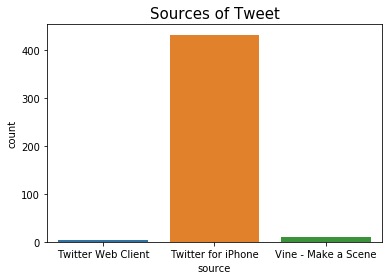

In [90]:

plt.title('Sources of Tweet', size=15)
sns.countplot(data=merge_df_clean, x='source')

2. What is the most stage of doges?

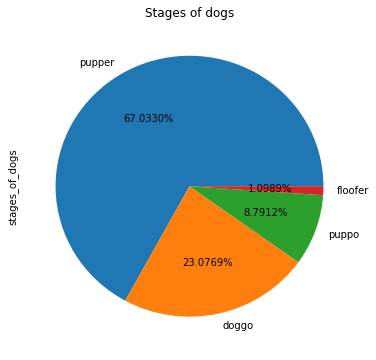

In [91]:
merge_df_clean.stages_of_dogs.value_counts().plot.pie(figsize=(6,6), autopct='%.4f%%')
plt.title('Stages of dogs')
plt.show()

3. What is the 3 frequent bread?

In [92]:
merge_df_clean['breed'].value_counts()[0:3].sort_values(ascending=False)


labrador_retriever    102
golden_retriever       92
cardigan               75
Name: breed, dtype: int64

Text(0.5,1,'Top 3 frequent dog breed')

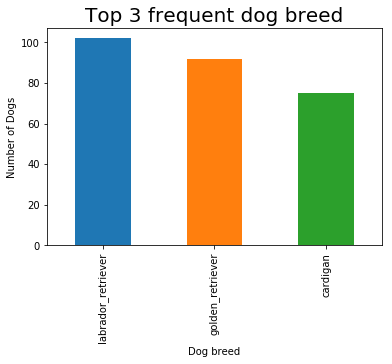

In [93]:
merge_df_clean['breed'].value_counts()[0:3].sort_values(ascending=False).plot(kind ='bar')
plt.xlabel('Dog breed')
plt.ylabel('Number of Dogs')
plt.title('Top 3 frequent dog breed', size=20)

4. compare the favorite counts & retweet counts ?

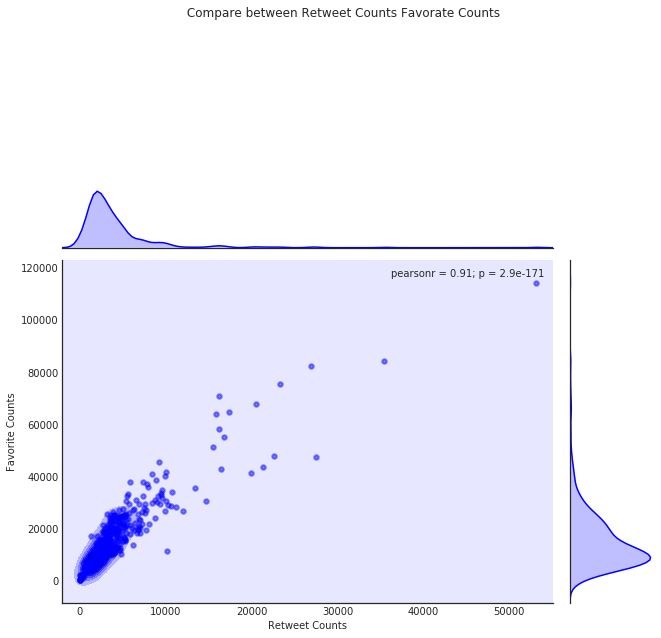

In [94]:
#Visualization
sns.set_style('white')
compare= sns.jointplot(data=merge_df_clean,x="retweet_count", y="favorite_count",kind="kde", color="blue", size=9)
compare.plot_joint(plt.scatter, marker=".",s=80,alpha=0.45, c="blue", linewidth=2)
compare.fig.subplots_adjust(top=0.7)
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.suptitle(' Compare between Retweet Counts Favorate Counts', Fontsize =15);

5. Number of Tweets per month?


In [95]:
data= merge_df_clean['tweet_id'].groupby([merge_df['tweet_date'].dt.month, merge_df['tweet_date'].dt.year]).count()
data.head()

tweet_date  tweet_date
1           2016          194
            2017           71
2           2016          125
            2017           72
3           2016          136
Name: tweet_id, dtype: int64

Text(0,0.5,'Number of Tweets')

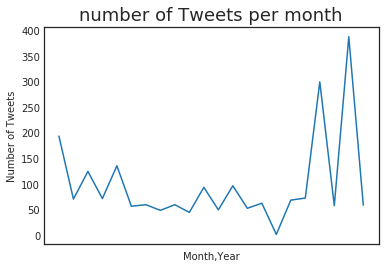

In [96]:
data.plot.line()
plt.title('number of Tweets per month', size=18)
plt.xlabel('Month,Year')
plt.ylabel('Number of Tweets')